<font size='5'>Fraud Detection:</font>

The aim of this project is to detect frauds in financial transactions using Python. The data were collected into several files:
the file "data.csv" which contains the amounts of the transactions (Montant_transaction) and the types of transactions,
 the file "historique.csv" which contains the amounts of the average shopping bag (Panier_moyen) of each user and number of transactions in the last ten hours (Nombre_Transactions_10_Dernieres_heures) and the file "fraude.csv" contains information concerning frauds. We should detect frauds from the files "test_data.csv" and "test_historique.csv". The metric that I use to evaluate performance will be roc_aus_score.

We start with importing some useful libraries like pandas, numpy and matplotlib. For implementing Machine Learning models, I will use the scikit-learn library.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

We read our data file. It has two parts "data" and "historique".

In [4]:
#read the data
data = pd.read_csv('../data.csv')
historiqe = pd.read_csv('../historique.csv')
output = pd.read_csv('../fraude.csv')
print(data.head(10))

   id_transaction  Montant_transaction  Type_transaction
0               0            80.600541               9.0
1               1           135.300834               9.0
2               2            64.697647              10.0
3               3           129.709763               7.0
4               4           197.145729               9.0
5               5           112.397940               7.0
6               6           141.176796               9.0
7               7           281.876321               7.0
8               8            69.499287               7.0
9               9            22.361063              10.0


In [5]:
print(historiqe.head(10))

   id_transaction  Panier_moyen  Nombre_Transactions_10_Dernieres_heures
0               0     70.355644                                        0
1               1    167.572760                                        0
2               2    149.669170                                        5
3               3    131.733207                                        0
4               5    158.568678                                        1
5               6    209.907891                                        6
6               8    130.796898                                        3
7              10    193.900513                                        9
8              11    244.678756                                        0
9              12    210.692532                                        4


In [6]:
test_data = pd.read_csv('../test_data.csv')
test_historiqe = pd.read_csv('../test_historique.csv')

We can create a new dataframe from "data" and "historique" by taking union from all columns and filling missing values by NaN and call it "all_data". We can do the same for the test set.

In [7]:
all_data = pd.merge(data, historiqe, how='outer')
all_test = pd.merge(test_data, test_historiqe, how='outer')

In [8]:
#get some information of our test dataframe for the test set
all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 5 columns):
id_transaction                             2000 non-null int64
Montant_transaction                        2000 non-null float64
Type_transaction                           2000 non-null float64
Panier_moyen                               1318 non-null float64
Nombre_Transactions_10_Dernieres_heures    1318 non-null float64
dtypes: float64(4), int64(1)
memory usage: 93.8 KB


<font size='5'>Understanding the data:</font>

In [9]:
all_data.head(5)

,id_transaction,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures
0,0,80.600541,9.0,70.355644,0.0
1,1,135.300834,9.0,167.572760,0.0
2,2,64.697647,10.0,149.669170,5.0
3,3,129.709763,7.0,131.733207,0.0
4,4,197.145729,9.0,NaN,NaN


In [10]:
#see the number of rows and columns
all_data.shape

(6000, 5)

In [11]:
#get some information of our dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 5 columns):
id_transaction                             6000 non-null int64
Montant_transaction                        6000 non-null float64
Type_transaction                           6000 non-null float64
Panier_moyen                               4033 non-null float64
Nombre_Transactions_10_Dernieres_heures    4033 non-null float64
dtypes: float64(4), int64(1)
memory usage: 281.2 KB


We add the output of our data which is called "is_fraud" to the data that we want to work on.

In [12]:
#add column"is_fraude" to our "all_data"
all_data_output= pd.merge(all_data, output, how='outer')

In [13]:
#call whole data (that we work on), all_data_output 
all_data_output.head(10)

,id_transaction,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,is_fraud
0,0,80.600541,9.0,70.355644,0.0,0
1,1,135.300834,9.0,167.572760,0.0,0
2,2,64.697647,10.0,149.669170,5.0,0
3,3,129.709763,7.0,131.733207,0.0,0
4,4,197.145729,9.0,NaN,NaN,0
5,5,112.397940,7.0,158.568678,1.0,0
6,6,141.176796,9.0,209.907891,6.0,0
7,7,281.876321,7.0,NaN,NaN,0
8,8,69.499287,7.0,130.796898,3.0,0
9,9,22.361063,10.0,NaN,NaN,0


Let's see the list of features that we have:

In [14]:
#list of features
features = all_data.drop(['id_transaction'],axis=1).columns
print(features)

Index(['Montant_transaction', 'Type_transaction', 'Panier_moyen',
       'Nombre_Transactions_10_Dernieres_heures'],
      dtype='object')


In [15]:
all_data_output.head(5)

,id_transaction,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,is_fraud
0,0,80.600541,9.0,70.355644,0.0,0
1,1,135.300834,9.0,167.572760,0.0,0
2,2,64.697647,10.0,149.669170,5.0,0
3,3,129.709763,7.0,131.733207,0.0,0
4,4,197.145729,9.0,NaN,NaN,0


We count the number of missing values in our data.

In [16]:
missing_value = all_data.isnull().sum().copy()
print(missing_value)

id_transaction                                0
Montant_transaction                           0
Type_transaction                              0
Panier_moyen                               1967
Nombre_Transactions_10_Dernieres_heures    1967
dtype: int64


We have many missing values in "Panier_moyen" and "Nombre_Transactions_10_Dernieres_heures". As we checked the number of the missing values are 1967 over 6000 data corresponding to these two features. The percentage of missing values for "Panier-moyen" and "Nombre_Transactions_10_Dernieres_heures" is:


In [17]:
print("percentage of missing values: ", 1967/6000 *100)

percentage of missing values:  32.78333333333333


In [18]:
all_data_output.describe()

,id_transaction,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,is_fraud
count,6000.000000,6000.000000,6000.000000,4033.000000,4033.000000,6000.000000
mean,2999.500000,135.056571,7.618333,149.271894,2.912720,0.110000
std,1732.195139,83.650612,1.730847,49.122507,4.097439,0.312916
min,0.000000,1.433002,1.000000,-36.032266,0.000000,0.000000
25%,1499.750000,71.646828,7.000000,116.857273,0.000000,0.000000
50%,2999.500000,120.250282,7.000000,149.396301,1.000000,0.000000
75%,4499.250000,183.882505,9.000000,182.530784,5.000000,0.000000
max,5999.000000,516.179216,10.000000,307.453916,25.000000,1.000000


We can see the data corresponding to the fraud and valid cases.

In [19]:
fraud = all_data_output[all_data_output['is_fraud']==1]
non_fraud = all_data_output[all_data_output['is_fraud']==0]

In [20]:
fraud.head(10)

,id_transaction,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,is_fraud
10,10,49.509656,9.0,193.900513,9.0,1
17,17,189.437661,9.0,96.318465,7.0,1
20,20,49.941138,9.0,NaN,NaN,1
24,24,39.660168,1.0,184.193752,9.0,1
26,26,98.209486,10.0,135.691299,14.0,1
32,32,127.194603,9.0,205.575025,11.0,1
53,53,203.008024,1.0,NaN,NaN,1
87,87,144.491064,9.0,NaN,NaN,1
99,99,95.661283,9.0,NaN,NaN,1
117,117,126.681737,9.0,NaN,NaN,1


In [21]:
non_fraud.head(10)

,id_transaction,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,is_fraud
0,0,80.600541,9.0,70.355644,0.0,0
1,1,135.300834,9.0,167.572760,0.0,0
2,2,64.697647,10.0,149.669170,5.0,0
3,3,129.709763,7.0,131.733207,0.0,0
4,4,197.145729,9.0,NaN,NaN,0
5,5,112.397940,7.0,158.568678,1.0,0
6,6,141.176796,9.0,209.907891,6.0,0
7,7,281.876321,7.0,NaN,NaN,0
8,8,69.499287,7.0,130.796898,3.0,0
9,9,22.361063,10.0,NaN,NaN,0


In [22]:
print('average of panier moyen of fraud transaction: ', fraud['Panier_moyen'].dropna().mean())
print('average of panier moyen of valid transaction: ', non_fraud['Panier_moyen'].dropna().mean())

average of panier moyen of fraud transaction:  140.30379953268763
average of panier moyen of valid transaction:  150.38415737473633


To see how the data in the feature "Panier-moyen" is distributed we plot the following diagram:

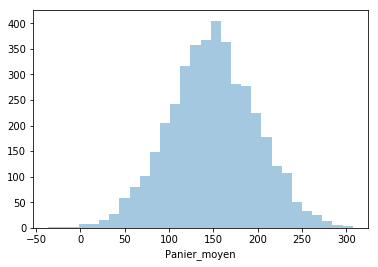

In [23]:
sns.distplot(all_data_output['Panier_moyen'].dropna(), kde=False, bins=30)
plt.show()

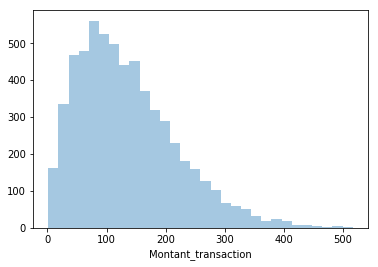

In [24]:
#to see how the feature "Montant_transaction" is distributed
sns.distplot(all_data_output['Montant_transaction'], kde=False, bins=30)
plt.show()

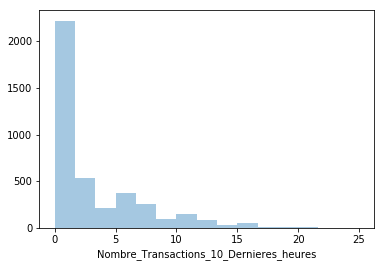

In [25]:
#to see how the feature "Nombre_Transactions_10_Dernieres_heures" is distributed
sns.distplot(all_data_output['Nombre_Transactions_10_Dernieres_heures'].dropna(), kde=False, bins=15)
plt.show()

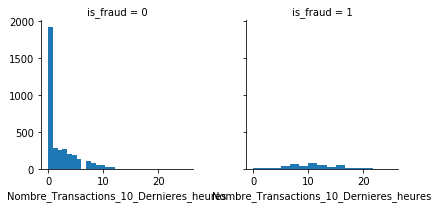

In [26]:
# To see how the data in 'Nombre_Transactions_10_Dernieres_heures' is distributed for valid and fraud transactions:
h = sns.FacetGrid(all_data_output, col='is_fraud')
h.map(plt.hist, 'Nombre_Transactions_10_Dernieres_heures', bins=15)

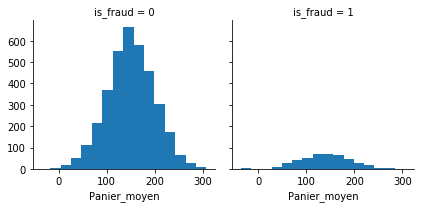

In [27]:
g = sns.FacetGrid(all_data_output, col='is_fraud')
g.map(plt.hist, 'Panier_moyen', bins=15)

We compute the percentage of valid and fraud transactions in the whole transactions.

In [28]:
output_fraud = output[output['is_fraud']==1]
num_fraud = len(output_fraud)

print("Number of fraud transaction: ",num_fraud)
print("Percentage of fraud transaction: ","{:.0%}".format(num_fraud/float(len(output)))) 

output_non_fraud = output[output['is_fraud']==0]
num_non_fraud = len(output_non_fraud)
print("Number of valid transaction: ",num_non_fraud)
print("Percentage of valid transaction: ", "{:.0%}".format(num_non_fraud/float(len(output))))
#our data is imbalanced! 
print('our data is imbalanced!')

Number of fraud transaction:  660
Percentage of fraud transaction:  11%
Number of valid transaction:  5340
Percentage of valid transaction:  89%
our data is imbalanced!


In [29]:
#The poroportion of fraud transactions compared to valid transactions
prop_fraud = num_fraud/num_non_fraud
print(prop_fraud)

0.12359550561797752


What is mean, max, min , ... of each faeture in the fraud cases?

In [30]:
fraud.Montant_transaction.describe()

count    660.000000
mean     174.423904
std      102.599098
min        8.193736
25%       89.270040
50%      158.288193
75%      240.216924
max      512.208842
Name: Montant_transaction, dtype: float64

Let's see which types of transactions are more used.

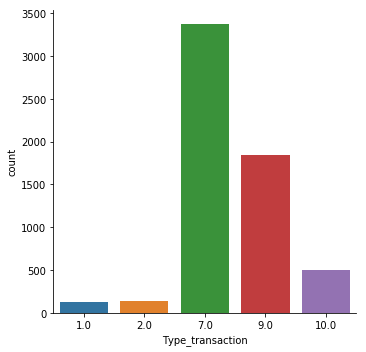

In [31]:
sns.catplot(x='Type_transaction',kind='count',data=all_data_output)
plt.show()

There are some types of transactions that are not used in our data. The transactions of types 9 and 7 are more used.

In [32]:
print('number of transactions of type 7: ', len(all_data_output[all_data_output['Type_transaction']==7]))
print('number of transactions of type 9: ', len(all_data_output[all_data_output['Type_transaction']==9]))

number of transactions of type 7:  3370
number of transactions of type 9:  1849


In which types of transactions, there are more fraud?

In [33]:
type_trans = range(1,11)
for i in type_trans:
    print(i, len(fraud[fraud['Type_transaction']==i]))   

1 62
2 19
3 0
4 0
5 0
6 0
7 167
8 0
9 361
10 51


In the types 9,7,1,10, 2 we have fraud transactions. In type 9 (Recurring E-commerce) 
and 7 (E-commerce with SSL/TLS Encryption) we have more fraud transactions among all.
In types 3, 4, 5, 6, 8, no fraud transactions happened.


In [34]:
#the percentage of fraud transactions in each type with respect to all types of transactions
ls_fraud = []
for i in range(1,11):
    ls_fraud.append("{:.2f}".format(len(fraud[fraud['Type_transaction']==i])/len(output_fraud)*100))#

results_fraud = pd.DataFrame({
    'type fraud': ['type1', 'type2', 'type3', 
              'type4', 'type5', 'type6', 
              'type7', 
              'type8','type9', 'type10'],
    'percent of fraud(%)': ls_fraud})

In [35]:
print(results_fraud)

  type fraud percent of fraud(%)
0      type1                9.39
1      type2                2.88
2      type3                0.00
3      type4                0.00
4      type5                0.00
5      type6                0.00
6      type7               25.30
7      type8                0.00
8      type9               54.70
9     type10                7.73


By looking at the data, we can see whenever the number of transactions in the lat 10 hours became more and more, the chance of having fraud transactions is higher.

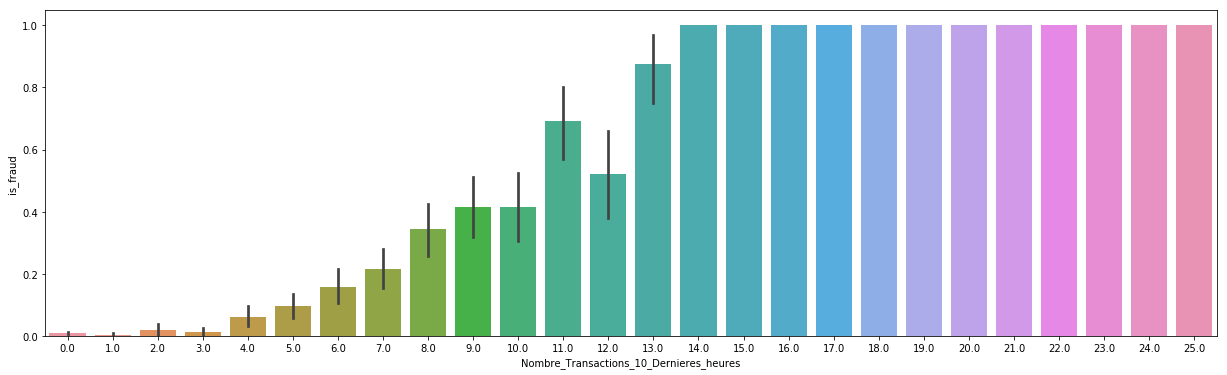

In [36]:
plt.figure(figsize=(21,6))
sns.barplot(x=all_data_output['Nombre_Transactions_10_Dernieres_heures'], y=all_data_output['is_fraud'])
plt.show()

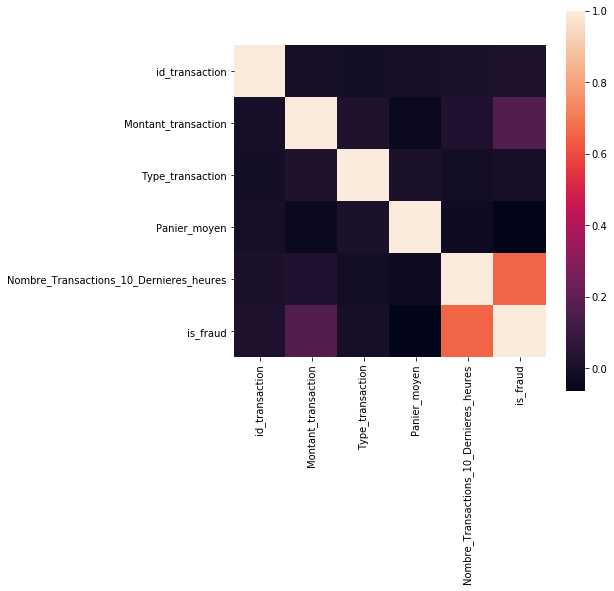

In [37]:
# see the correlations between features
Z = all_data_output
corrmat = Z.corr()
fig = plt.figure(figsize = (7, 7))
sns.heatmap(corrmat, vmax = 1, square = True)
plt.show()

We can see that the number of transactions in the last 10 hours can be the most effective feature for detecting fraud.

Let's see the average, min, max, ... of the "number of transactions in the last 10 hours" in valid and fraud transactions.

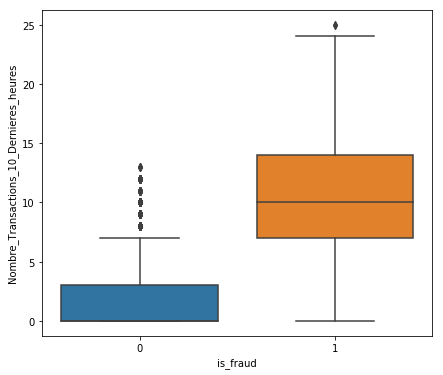

In [38]:
plt.figure(figsize=(7,6))
sns.boxplot(x='is_fraud', y='Nombre_Transactions_10_Dernieres_heures', data=all_data_output)
plt.show()

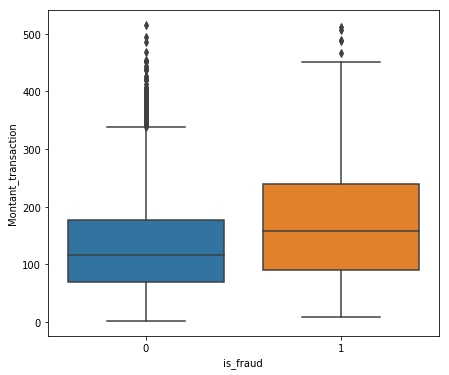

In [39]:
#see the average, min, max, ... of the amount of transaction for valid and fraud transactions
plt.figure(figsize=(7,6))
sns.boxplot(x='is_fraud', y='Montant_transaction', data=all_data_output)
plt.show()

Since the id_transaction doesn't have sense for detecting fraud, we can remove it

In [40]:
all_data_output.drop(['id_transaction'], axis = 1, inplace= True)

In [41]:
all_data_output.head(5)

,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,is_fraud
0,80.600541,9.0,70.355644,0.0,0
1,135.300834,9.0,167.572760,0.0,0
2,64.697647,10.0,149.669170,5.0,0
3,129.709763,7.0,131.733207,0.0,0
4,197.145729,9.0,NaN,NaN,0


<font size='5'>Preprocessing the data and making a model:</font>

We need to impute the missing values and build different models to check which model has better performance with our imputing. We use pipleline for this purpose to make this process faster.

In [42]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Since in the "Nombre_Transactions_10_Dernieres_heures" we have many zeros, the average and median can not be good values to be used for missing values. For example the median of the data for 'Nombre_Transactions_10_Dernieres_heures' is zero and it can not be proper value for detecting fraud. We can handle the missing values using KNNImputr for our data.

Let's create several models:

In [43]:
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

my_imputer = KNNImputer(n_neighbors = 5, weights='uniform', metric='nan_euclidean', copy = True)
random_forest = RandomForestClassifier(n_estimators=50,random_state=0)

my_model_1 = Pipeline(steps=[
('imputer', my_imputer),
('model', random_forest)])

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

my_model_2 = Pipeline(steps=[
('imputer', my_imputer),
('model', logreg)])

In [45]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb = GaussianNB()

my_model_3 = Pipeline(steps=[
('imputer', my_imputer),
('model', gaussian_nb)])

In [46]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(random_state=0, max_iter=1000)

my_model_4 = Pipeline(steps=[
('imputer', my_imputer),
('model', linear_svc)])

In [47]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

my_model_5 = Pipeline(steps=[
('imputer', my_imputer),
('model', decision_tree)])

In [48]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)

my_model_6 = Pipeline(steps=[
('imputer', my_imputer),
('model', sgd)])

In [49]:
input_data = all_data_output.drop(['is_fraud'], axis=1)

In [50]:
input_data.head(5)

,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures
0,80.600541,9.0,70.355644,0.0
1,135.300834,9.0,167.572760,0.0
2,64.697647,10.0,149.669170,5.0
3,129.709763,7.0,131.733207,0.0
4,197.145729,9.0,NaN,NaN


In [51]:
target = all_data_output['is_fraud']

In [52]:
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

<font size='4'>What is the best model?</font>

We use the cross validation set to understand which model can have better performance. The metrics that we can look, is roc_auc_score, f1_score and accuracy.

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
def get_score(model, X, Y, cv):
    roc_auc = cross_val_score(model, X, Y, cv=cv, scoring ='roc_auc')
    f1 = cross_val_score(model, X, Y, cv=cv, scoring ='f1')
    accuracy =cross_val_score(model, X, Y, cv=cv,scoring='accuracy')
    return roc_auc, f1, accuracy

In [54]:
#randomforest
get_score(my_model_1, input_data, target, 5)

(array([0.90173859, 0.88647004, 0.91285396, 0.89362728, 0.91076141]),
 array([0.69747899, 0.70222222, 0.73858921, 0.73469388, 0.66666667]),
 array([0.94      , 0.94416667, 0.9475    , 0.94583333, 0.935     ]))

In [55]:
#logistic Regression
get_score(my_model_2, input_data, target,5)

(array([0.84811599, 0.84388123, 0.85545767, 0.84978294, 0.87690103]),
 array([0.45360825, 0.51428571, 0.54455446, 0.5388601 , 0.52040816]),
 array([0.91166667, 0.915     , 0.92333333, 0.92583333, 0.92166667]))

In [56]:
#GaussianNB
get_score(my_model_3, input_data, target,5)

(array([0.85253518, 0.86283481, 0.84760527, 0.86379242, 0.87895812]),
 array([0.51908397, 0.57915058, 0.60869565, 0.57587549, 0.58039216]),
 array([0.895     , 0.90916667, 0.9175    , 0.90916667, 0.91083333]))

In [57]:
#support veactor machine
get_score(my_model_4, input_data, target,5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

(array([0.73705453, 0.83393627, 0.85231529, 0.84440614, 0.81440103]),
 array([0.19047619, 0.36470588, 0.3803681 , 0.5203252 , 0.42696629]),
 array([0.90083333, 0.91      , 0.91583333, 0.90166667, 0.915     ]))

In [58]:
#decision tree
get_score(my_model_5, input_data, target, 5)

(array([0.79762513, 0.7738764 , 0.81750085, 0.81984168, 0.79149642]),
 array([0.63076923, 0.63157895, 0.66914498, 0.67169811, 0.63082437]),
 array([0.9225    , 0.9275    , 0.92416667, 0.92583333, 0.92166667]))

In [59]:
#stochastic gradient descent
get_score(my_model_6, input_data, target,5)

(array([0.73409658, 0.72707411, 0.77213852, 0.79380178, 0.81721002]),
 array([0.31325301, 0.24836601, 0.275     , 0.07142857, 0.46013667]),
 array([0.90916667, 0.90333333, 0.91083333, 0.8975    , 0.8975    ]))

The best model using the mentioned metrics, is random forest. Now, we should improve our hyperparameters for random forest.

<font size='5'>Improving the model:</font>

We write a function to give us back roc_auc score and f1 score in terms of n_estimators in random forest model. 

In [60]:
def get_estimator (n):
    rf_model= Pipeline(steps=[
    ('knn_imputer',KNNImputer(n_neighbors = 5, weights='uniform', metric='nan_euclidean', copy = True)),
    ('rf',RandomForestClassifier(n_estimators=n,random_state=0))])
    return get_score(rf_model, input_data, target,5)

We write a dictionary whose keys are different n_estimators in random forest starting from 50 to 1050 with 50 steps and value of each key gives back roc_auc_score, f1_score and accuracy.   

In [61]:
first = 50
last = 1050
steps = 50

In [62]:
scores = {i:get_estimator(i) for i in range(first,last,steps)}

In [63]:
scores[50]

(array([0.90173859, 0.88647004, 0.91285396, 0.89362728, 0.91076141]),
 array([0.69747899, 0.70222222, 0.73858921, 0.73469388, 0.66666667]),
 array([0.94      , 0.94416667, 0.9475    , 0.94583333, 0.935     ]))

Now we make a list from the mean of roc_auc_scores (we have cv=5 in cross validation set) for each "n_estimators". We do make similar lists for f1_score and accuracy.

In [64]:
roc_auc = [scores[i][0].mean() for i in range(first, last,steps)]
f1 = [scores[i][1].mean() for i in range(first,last,steps)]
accuracy = [scores[i][2].mean() for i in range(first,last,steps)]

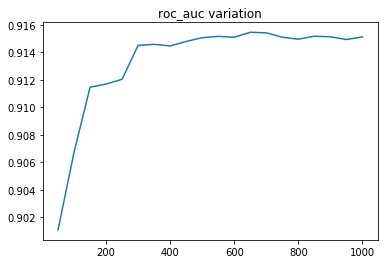

In [65]:
#we plot the variation of roc_auc in terms of n_estimators 
plt.title('roc_auc variation')
plt.plot(list(scores.keys()),roc_auc)

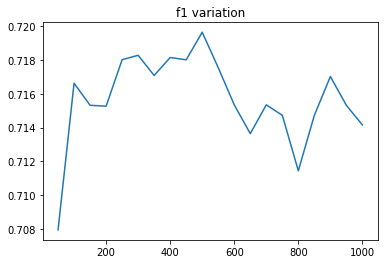

In [66]:
plt.title('f1 variation')
plt.plot(list(scores.keys()),f1)

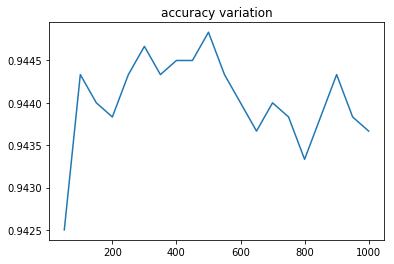

In [67]:
plt.title('accuracy variation')
plt.plot(list(scores.keys()),accuracy)

For n_estimators=500 or 950 we have higher roc_auc_score. We can write confusion matrix for our model for the case n_estimators=500 or 950 to see which one is better.

In [68]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
rf= Pipeline(steps=[
    ('knn_imputer',KNNImputer(n_neighbors = 5, weights='uniform', metric='nan_euclidean', copy = True)),
    ('rf',RandomForestClassifier(n_estimators=500,random_state=0))])
predictions = cross_val_predict(rf,input_data, target, cv=5)
confusion_matrix(target, predictions)

array([[5243,   97],
       [ 234,  426]])

In [69]:
rf_1= Pipeline(steps=[
    ('knn_imputer',KNNImputer(n_neighbors = 5, weights='uniform', metric='nan_euclidean', copy = True)),
    ('rf',RandomForestClassifier(n_estimators=950,random_state=0))])
predictions1 = cross_val_predict(rf_1,input_data, target, cv=5)
confusion_matrix(target, predictions1)

array([[5239,  101],
       [ 236,  424]])

The model 'rf' has a bit better performance than the model 'rf_1'. So we will take this as our model later!

In [70]:
#the area under roc_curve using the model 'rf' and using cross valiadtion score
from sklearn.metrics import roc_auc_score
roc_auc_score(predictions, target)

0.8859037148569491

Now, we plot roc_curve and compute the area under this curve:

In [71]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split
#split to train and valid sets
X_train, X_valid, y_train, y_valid = train_test_split(input_data, target, test_size=0.25, random_state = 0)
rf.fit(X_train, y_train)

prob_pred = rf.predict_proba(X_valid)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, prob_pred)

0.9047324942355368


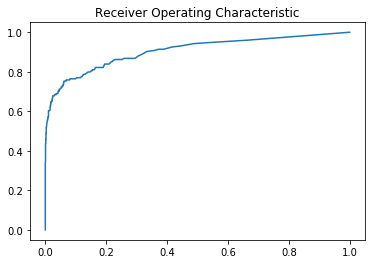

In [72]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
print(roc_auc_score(y_valid, prob_pred))

The curve passes not too far the upper left corner. So, until now, our model is not that bad with roc_auc_score.

Now we can improve our model by some process on our data and our features!

<font size="5">Create New features:</font>

We start to look at the feature 'Type_transaction'. We have fraud in the type transactions 1, 2, 7, 9, 10. We can compute the rate of  fraud transactions for each type of transaction.
For example, for type 1, among 131 transactions we have 62 fraud transactions and 69 valid transactions. So 
this type 1 not is really not secured.

In [73]:
print("fraud transaction in type 1: ", "{:.0%}".format(len(fraud[fraud['Type_transaction']==1])/float(
    len(all_data_output[all_data_output['Type_transaction']==1]))))

print("fraud transaction in type 2: ", "{:.0%}".format(len(fraud[fraud['Type_transaction']==2])/float(
    len(all_data_output[all_data_output['Type_transaction']==2]))))

print("fraud transaction in type 7: ", "{:.0%}".format(len(fraud[fraud['Type_transaction']==7])/float(
    len(all_data_output[all_data_output['Type_transaction']==7]))))

print("fraud transaction in type 9: ", "{:.0%}".format(len(fraud[fraud['Type_transaction']==9])/float(
    len(all_data_output[all_data_output['Type_transaction']==9]))))

print("fraud transaction in type 10: ", "{:.0%}".format(len(fraud[fraud['Type_transaction']==10])/float(
    len(all_data_output[all_data_output['Type_transaction']==10]))))

fraud transaction in type 1:  47%
fraud transaction in type 2:  13%
fraud transaction in type 7:  5%
fraud transaction in type 9:  20%
fraud transaction in type 10:  10%


We can give a weight to each type of transaction and create a new feature. The weight can be the probability of fraud transaction in each type. For example, we can take the weight 0.47 for each transaction with type 1. After adding this feature and running our model, its performance was not improved!



Let's try to find another feature. To me for a transaction with high number of transactions in the last 10 hours and high amount of transactions, the probabilty of being fraud is higher. We can create a new feature by multiplying of 'Nombre_Transactions_10_Dernieres_heures' and 'Montant_transaction'. With this feature we still couldn't get higher roc_auc_score!

<font size="3.5">New feature:</font>

In this new feature, we take in consideration the amount of the average basket. We consider the ratio 'Montant_transaction'/ ('Montant_transaction' + 'Panier_moyen'), which is a number between 0 and 1 that measures how far the transaction is from the average basket. Since there are fraudulous transactions with an amount that is lower than the average basket, but with a high number of transactions within the last 10 hours, we multiply this ratio by the square of the number of transactions to detect them.

In [74]:
datas = [all_data_output, all_test]
for dataset in datas:
    dataset['Ratio_nombre'] = ((dataset['Montant_transaction'])/(dataset['Panier_moyen'] + dataset['Montant_transaction']))*(1+dataset['Nombre_Transactions_10_Dernieres_heures'])*(1+dataset['Nombre_Transactions_10_Dernieres_heures'])

    
    


In [75]:
all_data_output.head(10)

,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,is_fraud,Ratio_nombre
0,80.600541,9.0,70.355644,0.0,0,0.533933
1,135.300834,9.0,167.572760,0.0,0,0.446724
2,64.697647,10.0,149.669170,5.0,0,10.865093
3,129.709763,7.0,131.733207,0.0,0,0.496130
4,197.145729,9.0,NaN,NaN,0,NaN
5,112.397940,7.0,158.568678,1.0,0,1.659215
6,141.176796,9.0,209.907891,6.0,0,19.703688
7,281.876321,7.0,NaN,NaN,0,NaN
8,69.499287,7.0,130.796898,3.0,0,5.551721
9,22.361063,10.0,NaN,NaN,0,NaN


In [76]:
all_data_feature = all_data_output.drop(['is_fraud'], axis=1)
all_test_feature = all_test.drop(['id_transaction'], axis=1).copy()

In [77]:
all_data_feature.head(5)

,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,Ratio_nombre
0,80.600541,9.0,70.355644,0.0,0.533933
1,135.300834,9.0,167.572760,0.0,0.446724
2,64.697647,10.0,149.669170,5.0,10.865093
3,129.709763,7.0,131.733207,0.0,0.496130
4,197.145729,9.0,NaN,NaN,NaN


In [78]:
all_test_feature.head(5)

,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,Ratio_nombre
0,224.816268,7.0,NaN,NaN,NaN
1,60.859179,7.0,NaN,NaN,NaN
2,102.417124,9.0,NaN,NaN,NaN
3,167.983158,9.0,121.925254,17.0,187.737027
4,478.561682,7.0,153.003607,0.0,0.757739


In [79]:
ROC, F1, ACCURACY = get_score(rf, all_data_feature, target, 5)

In [80]:
ROC

array([0.92456872, 0.91713483, 0.92968661, 0.92927874, 0.92892762])

In [81]:
ROC.mean()

0.9259193054136874

So by adding this feature we have 0.9259193054136874 as roc_aus_score.

<font size="5">Now it is time for our test data!</font>

In [82]:
all_test_feature.head(5)

,Montant_transaction,Type_transaction,Panier_moyen,Nombre_Transactions_10_Dernieres_heures,Ratio_nombre
0,224.816268,7.0,NaN,NaN,NaN
1,60.859179,7.0,NaN,NaN,NaN
2,102.417124,9.0,NaN,NaN,NaN
3,167.983158,9.0,121.925254,17.0,187.737027
4,478.561682,7.0,153.003607,0.0,0.757739


In [83]:
Id_transaction = all_test['id_transaction']

In [84]:
#Fit our model to our data and new feature!
rf.fit(all_data_feature, target)

Pipeline(steps=[('knn_imputer', KNNImputer()),
                ('rf',
                 RandomForestClassifier(n_estimators=500, random_state=0))])

In [85]:
pred_test= rf.predict(all_test_feature)

In [86]:
pred_fraud = pd.DataFrame({'id_transaction': Id_transaction, 'is_fraud': pred_test})

In [87]:
pred_fraud.to_csv('pred_fraud.csv', index=False)

In [88]:
pred_fraud.head(10)

,id_transaction,is_fraud
0,6000,0
1,6001,0
2,6002,0
3,6003,1
4,6004,0
5,6005,0
6,6006,0
7,6007,0
8,6008,0
9,6009,0
